<a href="https://colab.research.google.com/github/pythagoras58/qip_convex_hull_QSC/blob/main/VCPQSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install -U qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install pdflatex

In [67]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere, plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from scipy.stats import norm
import matplotlib.pyplot as plt

Bob's input is greater than or equal to Alice's


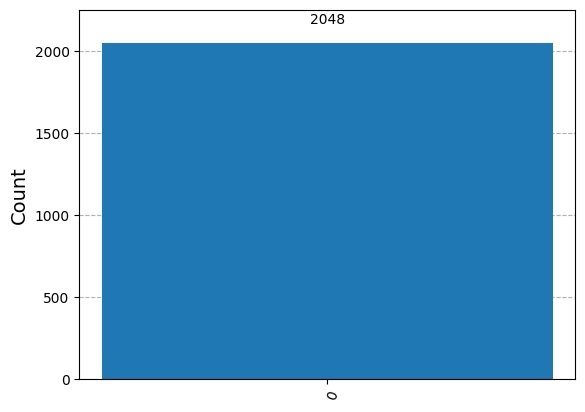

In [68]:


def create_quantum_commitment(input_value):
    qc = QuantumCircuit(1) #removed the classical bit.
    if input_value == 1:
        qc.x(0)
    return qc

def create_comparison_circuit(qc, alice_qubit, bob_qubit, result_qubit):
    # Example comparison: Alice > Bob
    qc.cx(alice_qubit, result_qubit)
    qc.cx(bob_qubit, result_qubit)
    qc.x(result_qubit)

simulator = AerSimulator()
input_Alice = 1
input_Bob = 0

qc_Alice = create_quantum_commitment(input_Alice)
qc_Bob = create_quantum_commitment(input_Bob)

qc = QuantumCircuit(3, 1)  # 3 qubits, 1 classical bit for comparison result
qc.append(qc_Alice, [0])
qc.append(qc_Bob, [1])

create_comparison_circuit(qc, 0, 1, 2) #alice qubit, bob qubit, comparison result qubit

qc.measure(2, 0) #Measure the comparison result.

"""
transpiled_circuit = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=num_shots).result()
    counts = result.get_counts()

    tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()
"""

tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=2048).result()
counts = result.get_counts()

if '1' in counts:
    print("Alice's input is greater than Bob's")
else:
    print("Bob's input is greater than or equal to Alice's")

qc.draw('mpl')
plot_histogram(counts)

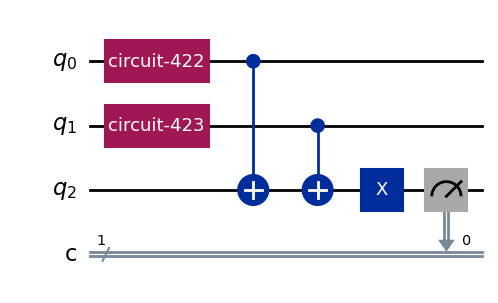

In [69]:
qc.draw('mpl')

Alice's Commitment Circuit:
   ┌───┐
q: ┤ X ├
   └───┘

Bob's Commitment Circuit:
   
q: 
   

Combined Circuit:
     ┌─────────────┐                  
q_0: ┤ circuit-430 ├──■───────────────
     ├─────────────┤  │               
q_1: ┤ circuit-431 ├──┼────■──────────
     └─────────────┘┌─┴─┐┌─┴─┐┌───┐┌─┐
q_2: ───────────────┤ X ├┤ X ├┤ X ├┤M├
                    └───┘└───┘└───┘└╥┘
c: 1/═══════════════════════════════╩═
                                    0 

Statevector Visualization (Before Measurement):

Bob's input is greater than or equal to Alice's


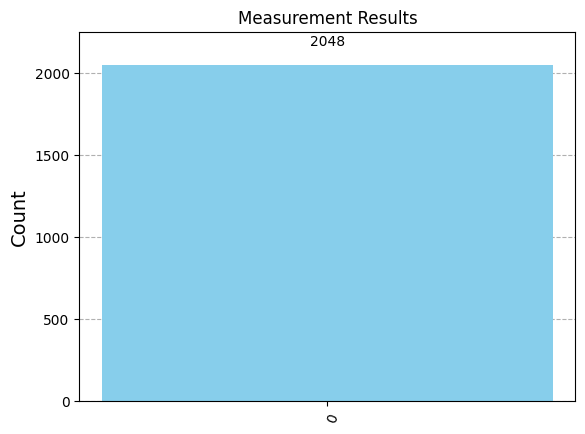

In [70]:


def create_quantum_commitment(input_value):
    qc = QuantumCircuit(1)
    if input_value == 1:
        qc.x(0)
    return qc

def create_comparison_circuit(qc, alice_qubit, bob_qubit, result_qubit):
    qc.cx(alice_qubit, result_qubit)
    qc.cx(bob_qubit, result_qubit)
    qc.x(result_qubit)

simulator = AerSimulator()
input_Alice = 1
input_Bob = 0

qc_Alice = create_quantum_commitment(input_Alice)
qc_Bob = create_quantum_commitment(input_Bob)

qc = QuantumCircuit(3, 1)
qc.append(qc_Alice, [0])
qc.append(qc_Bob, [1])
create_comparison_circuit(qc, 0, 1, 2)
qc.measure(2, 0)

# Visualize Individual Commitment Circuits
print("Alice's Commitment Circuit:")
print(qc_Alice.draw('text'))
print("\nBob's Commitment Circuit:")
print(qc_Bob.draw('text'))

# Visualize the Combined Circuit
print("\nCombined Circuit:")
print(qc.draw('text'))

# Simulate and Get Statevector Before Measurement
simulator_statevector = AerSimulator(method='statevector')
qc.save_statevector() #save the statevector.
tqc_statevector = transpile(qc, simulator_statevector)
result_statevector = simulator_statevector.run(tqc_statevector).result()
statevector = result_statevector.get_statevector()

# Visualize Statevector
print("\nStatevector Visualization (Before Measurement):")
plot_state_city(statevector)

# Simulate and Get Counts After Measurement
tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=2048).result()
counts = result.get_counts()

if '1' in counts:
    print("\nAlice's input is greater than Bob's")
else:
    print("\nBob's input is greater than or equal to Alice's")

# Enhanced Histogram Visualization
plot_histogram(counts, title="Measurement Results", color='skyblue')

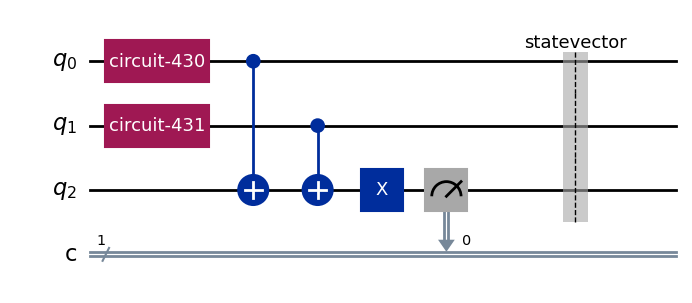

In [71]:
qc.draw('mpl')

# Complexity Checker

In [72]:
counts = qc.count_ops()
print(counts)

OrderedDict([('cx', 2), ('circuit-430', 1), ('circuit-431', 1), ('x', 1), ('measure', 1), ('save_statevector', 1)])


In [73]:
depth = qc.depth()
print(f"Circuit Depth: {depth}")

Circuit Depth: 5


In [74]:
num_qubits = qc.num_qubits
print(f"Number of Qubits: {num_qubits}")

Number of Qubits: 3
